Первые пять строк:
    user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
Информация о таблице:
 None
------------------------------------------------
Описательные статистики:
          user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   2

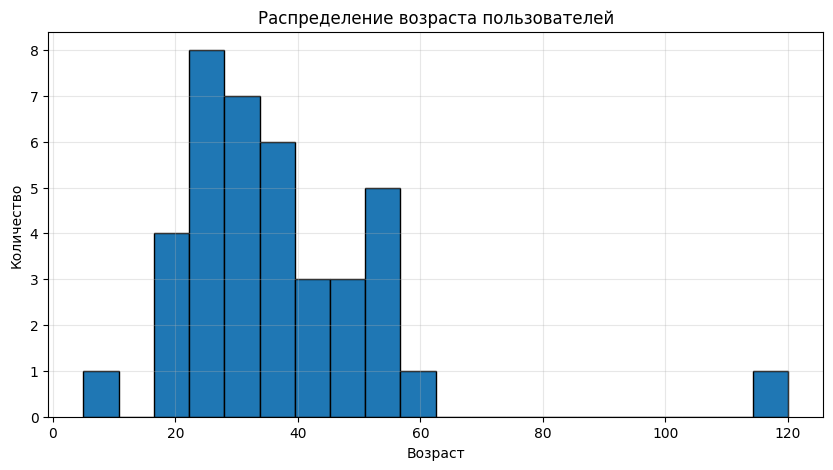

------------------------------------------------
Боксплот для количества покупок:



<Figure size 1000x500 with 0 Axes>

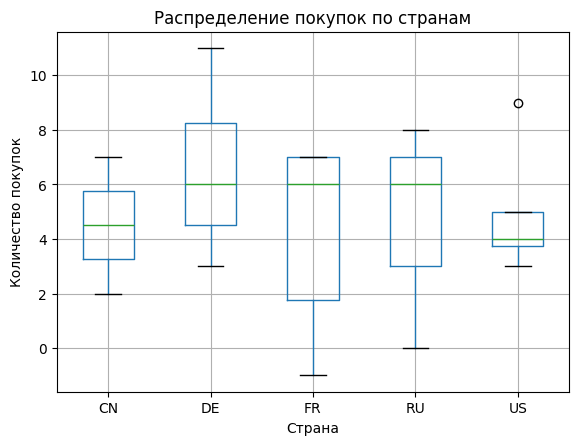

------------------------------------------------
Диаграмма рассеяния возраста и дохода:



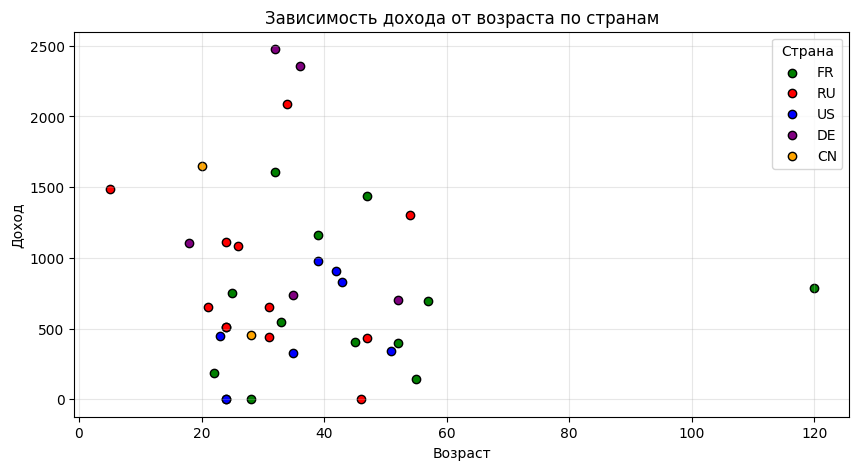

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Загрузка таблицы и её осмотр
df = pd.read_csv('S02-hw-dataset.csv')

print("Первые пять строк:\n", df.head())
print("------------------------------------------------")
print("Информация о таблице:\n",df.info())
print("------------------------------------------------")
print("Описательные статистики:\n",df.describe())
print("------------------------------------------------")

#Пропуски, дубликаты и базовый контроль качества
print("Пропуски:\n",df.isna().mean())
print("------------------------------------------------")
print("Дубликаты:\n",df.duplicated().sum())
print("------------------------------------------------")
print("Базовый контроль качества:")
suspicious_age = df[df['age'] > 100]
print("Долгожители:\n",suspicious_age)
nan_age = df[df['age'].isna()]
print("Нерождённые:\n",nan_age)
suspicious_purchases = df[df['purchases'] < 0]
print("Отрицательные закупки:\n",suspicious_purchases)
suspicious_revenue = df[(df['revenue'] <= 0) & (df['purchases'] > 0)]
print("Странная прибыль:\n",suspicious_revenue)
print("------------------------------------------------")
#Предоставленные данные имеют не очень хорошее качество, связанное с наличием
#пропусков и дубликатов. Некоторые данные невозможны, а дробный формат возраста
#вовсе не используется 

#Базовый EDA: группировки, агрегаты и частоты
print("Частоты по странам:\n", df['country'].value_counts())
print("------------------------------------------------")
print("Группировка среднего возраста и количества покупок по странам:")
grouped_country = df.groupby('country').agg({
    'age': ['mean', 'count'],  # средний возраст и их количество
    'purchases': ['mean', 'sum'],  # среднее количество покупок и их сумма
    'revenue': ['mean', 'sum']  # средний доход и общий доход
})
print(grouped_country)
#Наибольшее количество человек из Франции и России. Наименьшее количестов из Китая
#Самые старые люди тоже во Франции, а самое молодое население в Китае
#У Германии самый большой средние затраты на покупку, а у России наибольший суммарный доход
#Аномальность в частоте и группировке не была вявлена

print("------------------------------------------------")
print("Гистограмма для возраста:\n")
plt.figure(figsize=(10,5))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возраста пользователей')
plt.grid(True, alpha=0.3)
plt.savefig('figures/histogram_age.png', dpi=100)
plt.show()

print("------------------------------------------------")
print("Боксплот для количества покупок:\n")
plt.figure(figsize=(10, 5))
df.boxplot(column='purchases', by='country', grid=True)
plt.xlabel('Страна')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок по странам')
plt.suptitle('')
plt.savefig('figures/boxplot_purchases.png', dpi=100)
plt.show()

print("------------------------------------------------")
print("Диаграмма рассеяния возраста и дохода:\n")
plt.figure(figsize=(10, 5))
colors = {'FR': 'green', 'RU': 'red', 'US': 'blue', 'DE': 'purple', 'CN': 'orange'}
for country, color in colors.items():
    subset = df[df['country'] == country]
    plt.scatter(subset['age'], subset['revenue'], 
                label=country, color=color, alpha=1, edgecolors='black')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('Зависимость дохода от возраста по странам')
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)
plt.savefig('figures/scatter_age_revenue.png', dpi=100)
plt.show()